<a href="https://colab.research.google.com/github/Hafsa642/Machine-learning-project-/blob/main/segmentation_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


 Load Dataset

In [ ]:

df = pd.read_csv("Mall_Customers.csv")


 Basic Info

In [ ]:

print(df.head())
print(df.info())
print(df.describe())



   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

 Missing Values Check
 this is done just for practice as there is no missing value in dataset


In [ ]:

print("Missing values:\n", df.isnull().sum())


Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


 Drop Rows with Missing Values

In [ ]:

df = df.dropna()


 Fill Any Remaining Nulls (if dataset has none, it does nothing)

In [ ]:

df = df.fillna(df.mean(numeric_only=True))


In [ ]:

# Check Duplicates
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()




Duplicates: 0


 Value Counts (for non-numerical columns) this step was done with help of gpt

In [ ]:

for col in df.select_dtypes(include="object"):
    print(f"\nValue counts for {col}:\n", df[col].value_counts())



Value counts for Gender:
 Gender
Female    112
Male       88
Name: count, dtype: int64


 Correlation of Numeric Fields

In [ ]:

print("\nCorrelation:\n", df.corr(numeric_only=True))



Correlation:
                         CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


Histogram

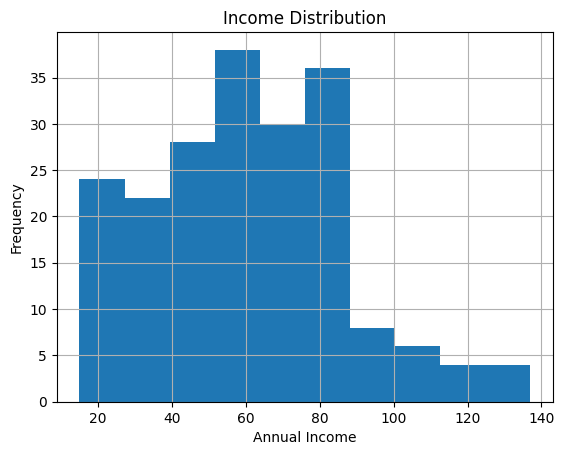

In [ ]:
df['Annual Income (k$)'].hist()
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("Income Distribution")
plt.show()


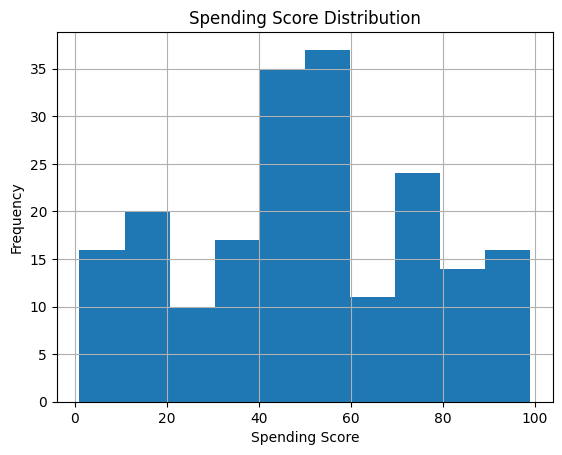

In [ ]:
df['Spending Score (1-100)'].hist()
plt.xlabel("Spending Score")
plt.ylabel("Frequency")
plt.title("Spending Score Distribution")
plt.show()


Bar Plot

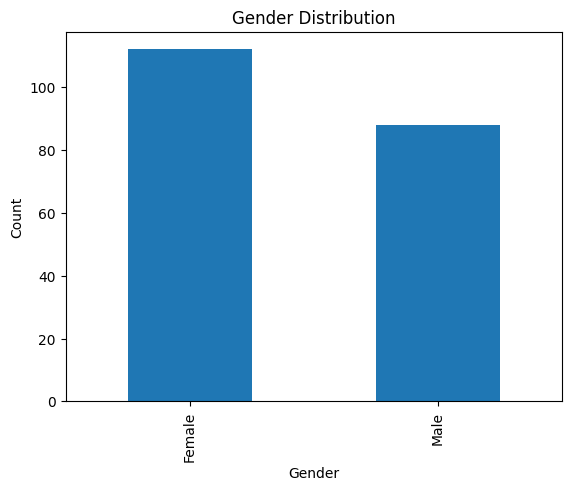

In [ ]:
df['Gender'].value_counts().plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()


 Select Features for Clustering

In [ ]:

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


 Scatter Plot (Initial EDA)

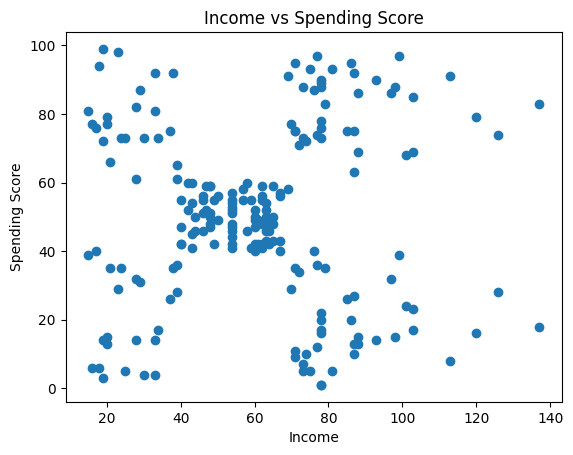

In [ ]:

plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Income vs Spending Score")
plt.show()


Elbow Method

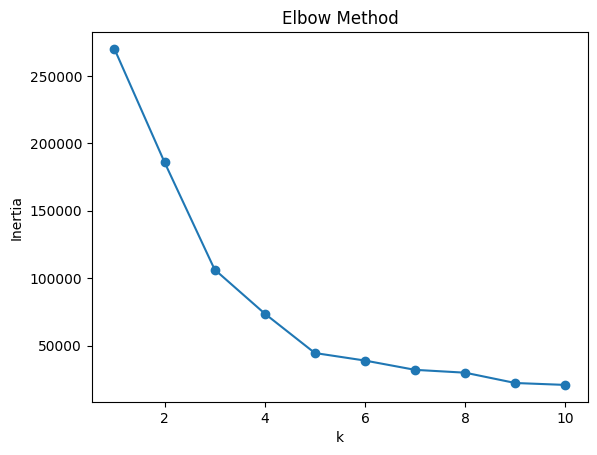

In [ ]:

inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [ ]:
import numpy as np

k_range = range(1, 11)
points = np.array(list(zip(k_range, inertia)))
p1, p2 = points[0], points[-1]
dist = np.abs(np.cross(p2-p1, p1-points)) / np.linalg.norm(p2-p1)

best_k = dist.argmax() + 1
print("Best k =", best_k)
# this was done with help of gpt bcz i was unable to
#  understand wvy k is 5 from graph


Best k = 5


/tmp/ipython-input-1689983220.py:6: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  dist = np.abs(np.cross(p2-p1, p1-points)) / np.linalg.norm(p2-p1)


There is no need for PCA bcz we r using 2 features

Annual Income

Spending Score

PCA is used to reduce multilple features for visualization